# 3. Régressions linéaires optimisées avec classification


 ulog_scheduler_0.csv  originel :

Colonnes originelles :
 Index(['timestamp', 'xtime', 'event'], dtype='object')


Etape de suppression de variable(s) qui ont certains noms :
event

Etape de suppression de variable(s) qui ont trop peu de valeurs differentes : 
Distribution de chaque colonne restante :
La variable timestamp a 70395 valeurs differentes.
La variable xtime a 1012 valeurs differentes.

 ulog_scheduler_0.csv  final :
       timestamp  xtime
0       15101432    194
1       15101629     60
2       15101692    117
3       15102433     32
4       15104433    173
...          ...    ...
70390   58393449     16
70391   58394468     98
70392   58394569     16
70393   58394589     13
70394   58395467     72

[70395 rows x 2 columns]

Colonnes finales :
 Index(['timestamp', 'xtime'], dtype='object')

 ulog_sensor_combined_0.csv  originel :

Colonnes originelles :
 Index(['timestamp', 'gyro_rad[0]', 'gyro_rad[1]', 'gyro_rad[2]',
       'gyro_integral_dt', 'accelerometer_timestamp_re

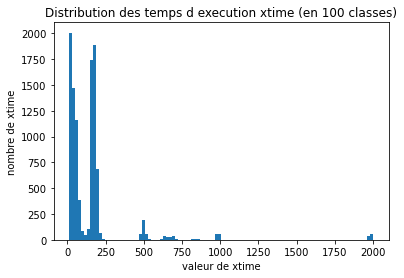

Distribution de chaque variable gyro et accelerometer (normalisée)


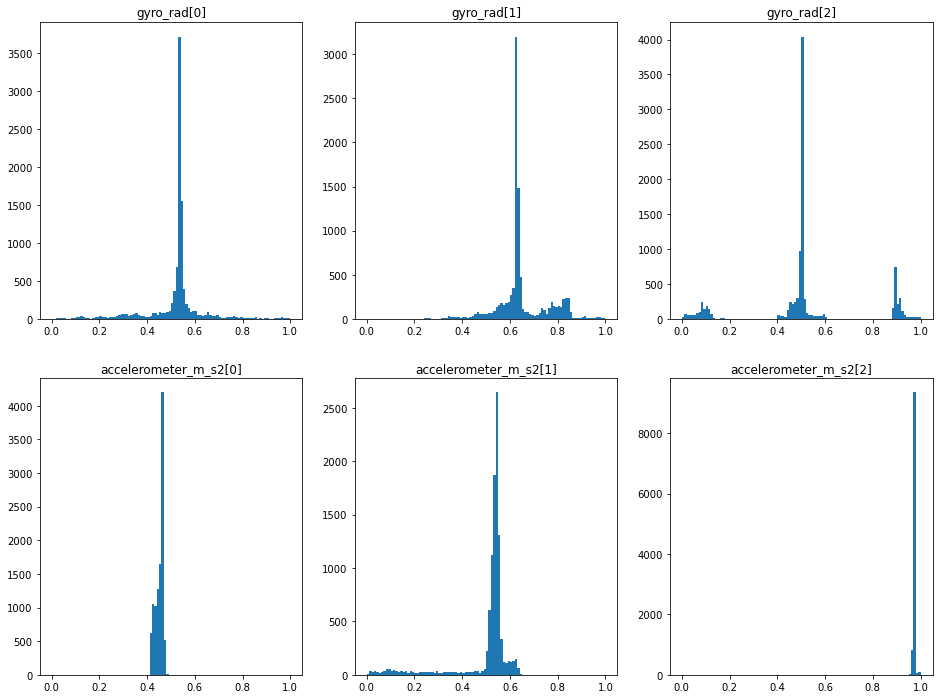

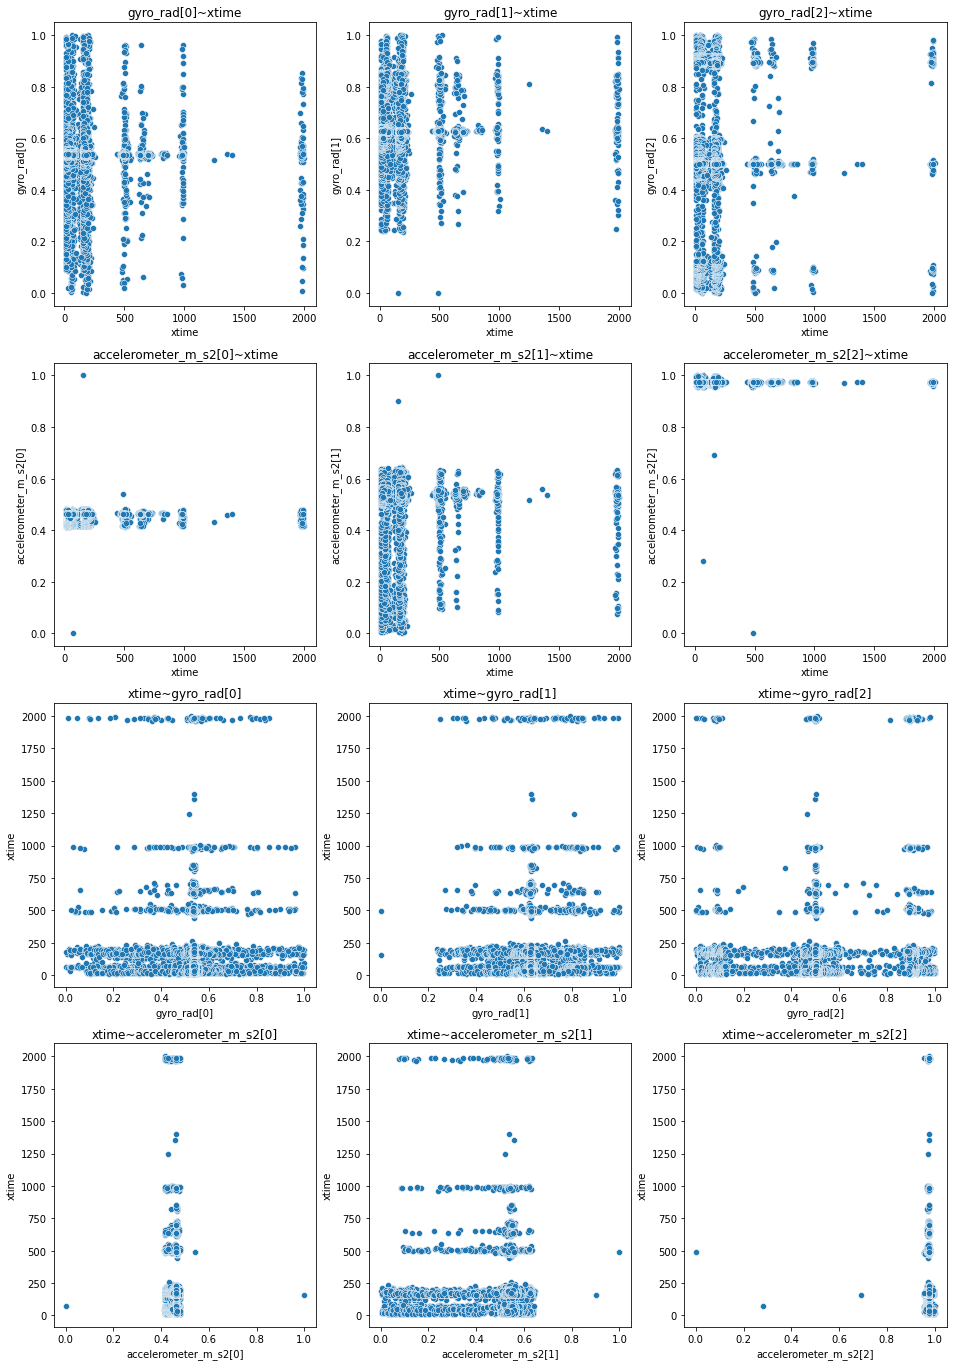

SyntaxError: invalid syntax (Temp/ipykernel_8108/888248936.py, line 1)

SyntaxError: invalid syntax (Temp/ipykernel_8108/888248936.py, line 1)

SyntaxError: invalid syntax (Temp/ipykernel_8108/888248936.py, line 1)

In [2]:
%run "2_premieres_regressions_lineaires.ipynb"

In [ ]:
    #Graphique a courbe de la distribution des xtime suivant une loi normale
import numpy as np
import seaborn as sns
import scipy
import statistics
import matplotlib.pyplot as plt

X=data["xtime"]    

mean=np.mean(X)
sd=statistics.stdev(X)

x = np.linspace(-400, 700, 100)
y = scipy.stats.norm.pdf(x,mean,sd)

plt.plot(x,y, color='red')
plt.grid()
plt.ylim(0,0.002)
plt.title('Courbe de xtime',fontsize=10)
plt.xlabel('x')
plt.ylabel('Distribution de xtime')
plt.show()

print("xtime suit la loi[",mean,",",sd,"]")

In [5]:
import numpy as np
import seaborn as sns
import scipy
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#k=nombre_classes
def kmeans(nombre_classes):
    features=data
    scaler = StandardScaler()
    features_std = scaler.fit_transform(features)
    cluster = KMeans(n_clusters=nombre_classes)
    model = cluster.fit(features_std)

    return model.labels_

In [6]:
def graphiques_lois_normales(nombre_classes):
    import matplotlib.pyplot as plt
    
    # moyennes des xtime par classe
    moyennes=data.groupby(kmeans(nombre_classes))['xtime'].mean()
    # ecarts-types des xtime par classe
    ecarts_types=data.groupby(kmeans(nombre_classes))['xtime'].std()
    
    # on va faire 10000 predictions entre -300 et 1200
    x = np.linspace(-300, 1200, 10000)
    
    #pour chaque classe i 
    for i in range(nombre_classes):
        # on fait une courbe avec en abscisse x et en ordonnees la loi, 
        # labelisee par un texte avec sa moyenne et son ecart type
        plt.plot(x,
                 scipy.stats.norm.pdf(x,
                                      moyennes[i],
                                      ecarts_types[i]),
                 label="".join(["N( ",
                                str(round(moyennes[i])),
                                " ; ",
                                str(round(ecarts_types[i])),
                               " )"] ) )
        
    plt.legend(loc="upper right")
    plt.grid()
    plt.ylim(0)
    plt.title("".join([str(i+1), " lois et distributions"]))
    plt.xlabel('valeurs de xtime')
    plt.ylabel('Distribution de xtime')

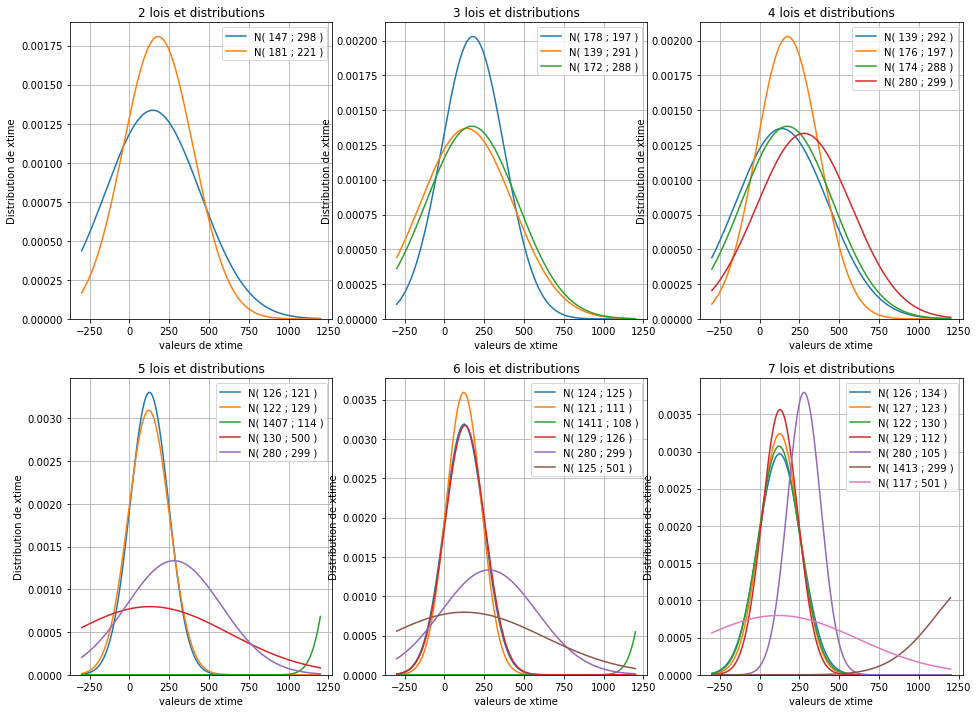

In [10]:
place=0
plt.figure(figsize=(16,12))
for i in range(2,8):
    place=place+1
    plt.subplot(2,3,place)
    graphiques_lois_normales(i)
plt.show()

1 : 142052.44343574328  ; 2 : 125025.51503375747  ; 3 : 123820.13294426129  ; 4 : 112218.61681458337  ; 5 : 111873.52718655438  ; 6 : 111079.31140428172  ; 7 : 109753.79682001006  ; 8 : 109455.31084462839  ; 9 : 107005.59374445121  ; 10 : 106657.85863275368  ; 11 : 106596.32982077594  ; 12 : 105859.12737728537  ; 13 : 102884.85345225477  ; 14 : 102864.4184345657  ; 15 : 102728.73528186102  ; 16 : 102782.32352204039  ; 17 : 102739.82810117143  ; 18 : 102767.78768158254  ; 19 : 102794.60030595535  ; 

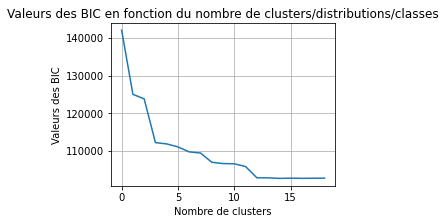

In [15]:
#BIC le plus petit ?
import numpy as np
from sklearn.mixture import GaussianMixture

X = np.array(data)[:, 0:1]

listebic=[]

for i in range(1, 20):
    gmmodel=GaussianMixture(n_components=i, random_state=0).fit(X)
    listebic.append(gmmodel.bic(X))
    print(i,":",gmmodel.bic(X)," ; ",end='')


plt.figure(figsize=(4, 3))
plt.plot(listebic)
plt.grid()
plt.title("Valeurs des BIC en fonction du nombre de clusters/distributions/classes")
plt.xlabel('Nombre de clusters')
plt.ylabel('Valeurs des BIC')
plt.show()

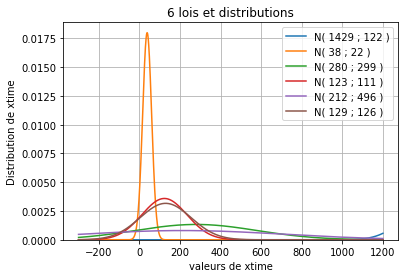

In [17]:
graphiques_lois_normales(6)

   xtime  gyro_rad[0]  gyro_rad[1]  gyro_rad[2]  accelerometer_m_s2[0]  \
0   16.0     0.539389     0.628170     0.501068               0.464922   
1   50.0     0.539565     0.629149     0.500877               0.464798   
2  174.0     0.538653     0.628641     0.500543               0.464794   
3   19.0     0.536090     0.626586     0.500711               0.465495   
4  167.0     0.538545     0.627787     0.501683               0.464896   

   accelerometer_m_s2[1]  accelerometer_m_s2[2]  classes  
0               0.542967               0.974114        0  
1               0.553677               0.974372        0  
2               0.556481               0.974337        1  
3               0.545574               0.974302        0  
4               0.533710               0.974070        1  


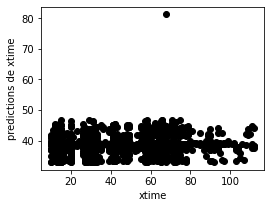

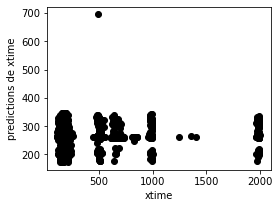

In [22]:
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.linear_model import LinearRegression

data=data.copy()
# xtime :
x=data.values[:,0].reshape(-1, 1)

# classification GMM en 6 classes
g = mixture.GaussianMixture(n_components=6,covariance_type='full')
g.fit(x)

classes=[]
# transformation des 6 classes en 2 classes avec pour critere une moyenne au dessus ou en dessous de :
separateur= round(data.values[:,0].mean()) #environ 100

# pour chaque c dans g.predict(x)
for c in g.predict(x):
    # si c'est <100 on met dans la nouvelle classe n°0
    if g.means_[c, 0]<=separateur:
        classes.append(0)
    # sinon (si >100) on met dans la nouvelle classe n°1
    else:
        classes.append(1)

# on met cette liste dans le tableau
data['classes'] = classes

print(data.head())

# pour chaque d dans la liste [classe=n°0 ; classe=n°1],
#  regression lineaire
for d in data[data["classes"]==0], data[data["classes"]==1]:

    # X est les valeurs d un dataframe compose des variable hors xtime et hors classes
    X=d.values[:,1:-1]

    # en abscisse = xtime originaux
    y=d.values[:,0]

    # regression lineaire sur xtime y selon les variables dans X
    lmodellineaire = LinearRegression()
    lmodellineaire.fit(X,y)
    # en ordonnee = xtime predits 
    y_predict = lmodellineaire.predict(X)   

    plt.figure('Linear model plot',figsize=(4, 3))
    plt.scatter(y, y_predict,  color='black')
    plt.ylabel("predictions de xtime")
    plt.xlabel("xtime")
    plt.show()


describe xtime :
 count    10351.000000
mean       150.498696
std        230.901346
min         10.000000
25%         32.000000
50%        131.000000
75%        177.000000
max       2002.000000
Name: xtime, dtype: float64
classes : [0 1 2 3 4 5]
shape : (10351, 8)
[0]


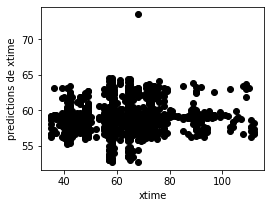

[1]


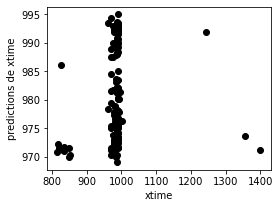

[2]


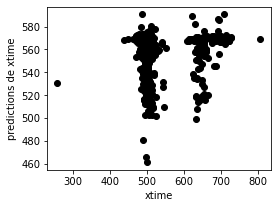

[3]


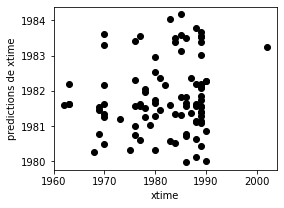

[4]


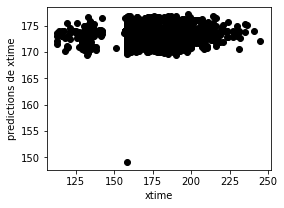

[5]


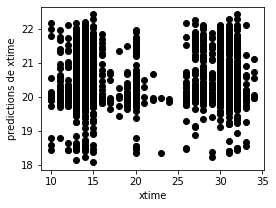

In [41]:
nombre_classes_1=6

import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.linear_model import LinearRegression

def creation_classes_gmm(data):  
    import matplotlib.pyplot as plt
    from sklearn import mixture
    from sklearn.linear_model import LinearRegression

    data=data.copy()
    
    x=data.values[:,0].reshape(-1, 1)

    # classification GMM en 6 classes
    g = mixture.GaussianMixture(n_components=nombre_classes_1,covariance_type='full')
    g.fit(x)
    data['classes']= g.predict(x)
    
    return data


data=creation_classes_gmm(data)

print("describe xtime :\n",data["xtime"].describe())
print("classes :",np.unique(data["classes"]))
print("shape :",data.shape)

for d in [data[data["classes"]==i] for i in range(nombre_classes_1)]:

    # X est les valeurs d un dataframe composé des variable hors xtime(1) et hors classes(-1)
    X=d.values[:,1:-1]

    # en abscisse = xtime originaux
    y=d.values[:,0]

    # regression lineaire sur xtime y selon les variables dans X
    lmodellineaire = LinearRegression()
    lmodellineaire.fit(X,y)
    # en ordonnee = xtime predits 
    y_predict = lmodellineaire.predict(X) 

    print(np.unique(d["classes"]))
    plt.figure('Linear model plot', figsize=(4,3))
    plt.scatter(y, y_predict,  color='black')
    plt.ylabel("predictions de xtime")
    plt.xlabel("xtime")    
    plt.show()
    
